## 机器学习初探

In [1]:
## Gradient

In [2]:
import random


def loss(k):
    return 3 * (k ** 2) + 7 * k - 10

# -b / 2a = -7 / 6


def partial(k):
    return 6 * k + 7


k = random.randint(-10, 10)
alpha = 1e-3 # 0.001

for i in range(1000):
    k = k + (-1) * partial(k) *alpha
    print(k, loss(k))

6.951 183.606203
6.9022939999999995 181.241045387308
6.853880235999999 178.90418452029422
6.805756954583999 176.5952818566934
6.757922412856495 174.31400290455994
6.710374878379357 172.0600171738098
6.66311262910908 169.83299812834233
6.616133953334426 167.63262313873486
6.569437149614419 165.458573435503
6.523020526716733 163.31053406292068
6.4768824035564325 161.1881938333919
6.431021109135094 159.0912452823692
6.385434982480284 157.01938462381094
6.340122372585403 154.97231170617167
6.29508163834989 152.94972996891903
6.250311148519791 150.95134639957092
6.205809281628673 148.97687149124647
6.161574425938901 147.0260192007252
6.117604979383268 145.09850690700773
6.073899349506968 143.1940553703723
6.030455953409926 141.31238869192114
5.9872732176894665 139.45323427361103
5.94434957838333 137.6163227787615
5.90168348091303 135.8013880930364
5.859273380027552 134.00816728589132
5.8171177397473866 132.23640057248292
5.7752150333089025 130.48583127603376
5.733563743109049 128.7562057906

## Dynamic

In [3]:
from collections import defaultdict
from functools import wraps
from icecream import ic

In [4]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 33]
price = defaultdict(int)
for i, p in enumerate(original_price):
    price[i+1] = p

In [5]:
def memo(func):
    cache = {}
    @wraps(func)
    def _wrap(n): ## ? *args, **kwargs
        if n in cache: result = cache[n]
        else:
            result = func(n)
            cache[n] = result
        return result
    return _wrap


@memo
def r(n):
    max_price, split_point = max(
        [(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )
    solution[n] = (split_point, n - split_point)
    
    return max_price


def not_cut(split): return split == 0

def parse_solution(target_length, revenue_solution):
    left, right = revenue_solution[target_length]
    
    if not_cut(left): return [right]

    return parse_solution(left, revenue_solution) + parse_solution(right, revenue_solution)

In [6]:
solution = {}
ic(r(50))
ic(parse_solution(20, solution))
ic(parse_solution(19, solution))
ic(parse_solution(27, solution))

ic| r(50): 150
ic| parse_solution(20, solution): [10, 10]
ic| parse_solution(19, solution): [2, 6, 11]
ic| parse_solution(27, solution): [6, 10, 11]


[6, 10, 11]

## Gradient descent

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random

from icecream import ic

In [8]:

def func(x):
    return 10 * x**2 + 32*x + 9


def gradient(x):
    return 20 *x + 32


In [9]:
x = np.linspace(-10, 10)


steps = []

x_star = random.choice(x)

alpha = 1e-3

ic| x_star: -3.8319999999999994, func(x_star): 33.218239999999966
ic| x_star: -3.7873599999999996, func(x_star): 31.245437695999982
ic| x_star: -3.7436127999999997, func(x_star): 29.3507583632384
ic| x_star: -3.700740544, func(x_star): 27.53110833205416
ic| x_star: -3.65872573312, func(x_star): 25.783516442104798
ic| x_star: -3.6175512184575997, func(x_star): 24.10512919099746
ic| x_star: -3.577200194088448, func(x_star): 22.493206075033953
ic| x_star: -3.537656190206679, func(x_star): 20.94511511446261
ic| x_star: -3.4989030664025456, func(x_star): 19.45832855592991
ic| x_star: -3.4609250050744946, func(x_star): 18.030418745115085
ic| x_star: -3.423706504973005, func(x_star): 16.65905416280853
ic| x_star: -3.3872323748735447, func(x_star): 15.341995617961317
ic| x_star: -3.3514877273760737, func(x_star): 14.077092591490043
ic| x_star: -3.316457972828552, func(x_star): 12.862279724867022
ic| x_star: -3.282128813371981, func(x_star): 11.695573447762285
ic| x_star: -3.2484862371045415, f

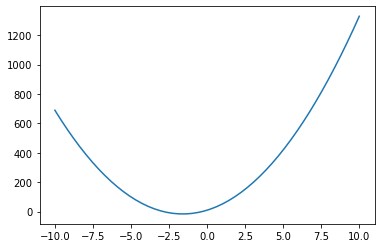

In [10]:
for i in range(100):
    x_star = x_star + -1*gradient(x_star)*alpha
    steps.append(x_star)

    ic(x_star, func(x_star))

fig, ax = plt.subplots()
ax.plot(x, func(x))

In [11]:
for i, s in enumerate(steps):
    ax.annotate(str(i+1), (s, func(s)))

plt.show()

In [12]:
## KMeans Finding Centers

In [13]:
from pylab import mpl

In [14]:
mpl.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [15]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [16]:
### Feature Extractor

In [17]:
city_location = {
    '香港': (114.17, 22.28)
}
test_string = "{name:'兰州', geoCoord:[103.73, 36.03]},"

In [18]:
import re

In [19]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")

In [20]:
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    if not city_info: continue
    
    # following: we find the city info
    
    city, long, lat = city_info[0]
    
    long, lat = float(long), float(lat)
    
    city_location[city] = (long, lat)

In [21]:
city_location

{'香港': (114.17, 22.28),
 '兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '澳门': (113.54, 22.19)}

In [22]:
import math

In [23]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lon1, lat1 = origin
    lon2, lat2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [28]:
### Vector Distances

+ 余弦距离 Cosine Distance

+ 欧几里得距离 Euclidean Distance

+ 曼哈顿距离 Manhattan distance or Manhattan length

In [29]:
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

ImportError: cannot import name 'argmap' from 'networkx.utils.decorators' (/Users/du/miniforge3/envs/tf/lib/python3.9/site-packages/networkx/utils/decorators.py)

In [26]:
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_location.keys()))
nx.draw(city_graph, city_location, with_labels=True, node_size=30)

NameError: name 'nx' is not defined

In [28]:
### K-means: Initial k random centers

In [29]:
k = 10

In [30]:
import random

In [31]:
all_x = []
all_y = []

for _, location in city_location.items():
    x, y = location
    
    all_x.append(x)
    all_y.append(y)

In [32]:
def get_random_center(all_x, all_y):
    r_x = random.uniform(min(all_x), max(all_x))
    r_y = random.uniform(min(all_y), max(all_y))
    
    return r_x, r_y

In [33]:
get_random_center(all_x, all_y)

(117.28402281038032, 22.680947236290187)

In [34]:
K = 5
centers = {'{}'.format(i+1): get_random_center(all_x, all_y) for i in range(K)}

In [4]:
from collections import defaultdict

In [36]:
closet_points = defaultdict(list)

for x, y, in zip(all_x, all_y):
    closet_c, closet_dis = min([(k, geo_distance((x, y), centers[k])) for k in centers], key=lambda t: t[1])    
    
    closet_points[closet_c].append([x, y])

In [37]:
import numpy as np

In [38]:
def iterate_once(centers, closet_points, threshold=5):
    have_changed = False
    
    for c in closet_points:
        former_center = centers[c]

        neighbors = closet_points[c]

        neighbors_center = np.mean(neighbors, axis=0)

        if geo_distance(neighbors_center, former_center) > threshold:
            centers[c] = neighbors_center
            have_changed = True
        else:
            pass ## keep former center
        
    return centers, have_changed

In [39]:
def kmeans(Xs, k, threshold=5):
    all_x = Xs[:, 0]
    all_y = Xs[:, 1]
    
    K = k
    
    centers = {'{}'.format(i+1): get_random_center(all_x, all_y) for i in range(K)}
    
    changed = True
    
    while changed:
        closet_points = defaultdict(list)

        for x, y, in zip(all_x, all_y):
            closet_c, closet_dis = min([(k, geo_distance((x, y), centers[k])) for k in centers], key=lambda t: t[1])    
            closet_points[closet_c].append([x, y])   
            
        centers, changed = iterate_once(centers, closet_points, threshold)
        print('iteration')

    return centers

In [40]:
kmeans(np.array(list(city_location.values())), k=5, threshold=5)

iteration
iteration
iteration
iteration
iteration
iteration
iteration


{'1': array([117.833,  39.861]),
 '2': array([106.45333333,  25.78833333]),
 '3': array([103.772,  36.96 ]),
 '4': array([89.395, 36.87 ]),
 '5': array([116.87166667,  27.6275    ])}

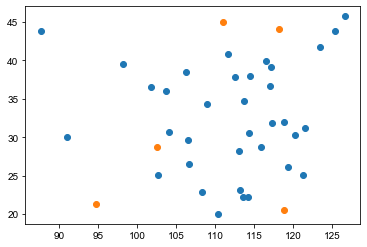

In [41]:
plt.scatter(all_x, all_y)
plt.scatter(*zip(*centers.values()))

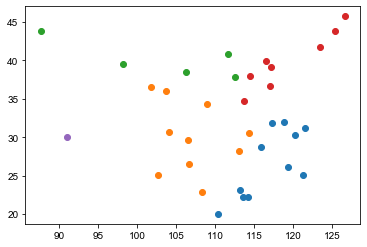

In [42]:
for c, points in closet_points.items():
    plt.scatter(*zip(*points))

In [43]:
city_location_with_station = {
    '能源站-{}'.format(i): position for i, position in centers.items()
}

In [44]:
city_location_with_station

{'能源站-1': (110.9729881306889, 45.038433789976594),
 '能源站-2': (94.72886008096123, 21.342491991609414),
 '能源站-3': (118.16998170287782, 44.064174506047095),
 '能源站-4': (102.61716608266983, 28.734756416128093),
 '能源站-5': (118.86241196932242, 20.59481585797602)}

In [45]:
def draw_cities(citise, color=None):
    city_graph = nx.Graph()
    city_graph.add_nodes_from(list(citise.keys()))
    nx.draw(city_graph, citise, node_color=color, with_labels=True, node_size=30)

In [46]:
%matplotlib inline

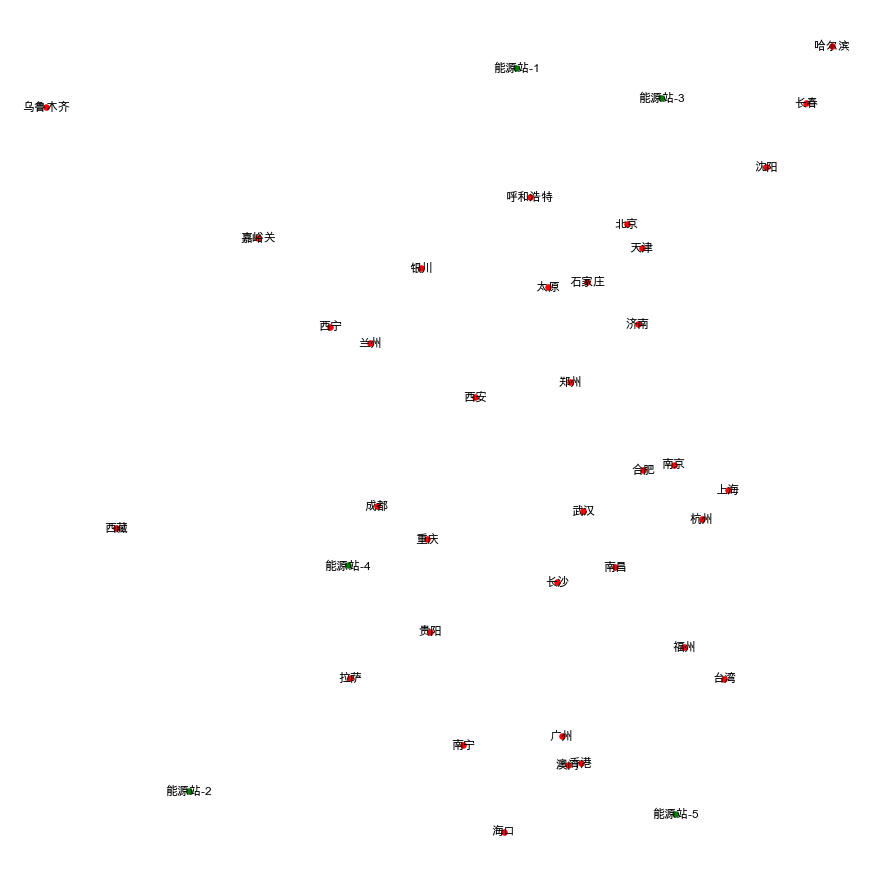

In [47]:
plt.figure(1,figsize=(12,12)) 
draw_cities(city_location_with_station, color='green')
draw_cities(city_location, color='red')

# Cutting Problem

All the dynamic programming:
1. sub-problems
2. Overlapping sub-problems
3. parse solution

In [5]:
from collections import defaultdict
from functools import lru_cache
# least recent used

In [6]:
prices = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 33]
complete_price = defaultdict(int)
for i, p in enumerate(prices): complete_price[i+1] = p

In [7]:
solution = {}

cache = {}
#<- if when n .... is huge. size(cache)
# keep most important information.

In [8]:
@lru_cache(maxsize=2**10)
def r(n):
    # a very classical dynamic programming problem
    # if n in cache: return cache[n]

    candidates = [(complete_price[n], (n, 0))] + \
                 [(r(i) + r(n-i), (i, n - i)) for i in range(1, n)]

    optimal_price, split = max(candidates)

    solution[n] = split

    # cache[n] = optimal_price

    return optimal_price

In [9]:

def parse_solution(n, cut_solution):
    left, right = cut_solution[n]

    if left == 0 or right == 0: return [left+right, ]
    else:
        return parse_solution(left, cut_solution) + parse_solution(right, cut_solution)


In [10]:
if __name__ == '__main__':
    print(r(19))
    print(parse_solution(19, solution))

55
[11, 6, 2]


# About the dataset


This contains data of news headlines published over a period of 15 years. From the reputable Australian news source ABC (Australian Broadcasting Corp.)

Site: http://www.abc.net.au/

Prepared by Rohit Kulkarni

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [14]:
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("~/data/cnews/abcnews-date-text.csv",error_bad_lines=False,usecols =["headline_text"])
data.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [15]:
data.to_csv('~/data/cnews/abcnews.csv', index=False, encoding='utf8')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103665 entries, 0 to 1103664
Data columns (total 1 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   headline_text  1103665 non-null  object
dtypes: object(1)
memory usage: 8.4+ MB


# Deleting dupliate headlines(if any)

In [61]:
data[data['headline_text'].duplicated(keep=False)].sort_values('headline_text').head(8)

,headline_text
57973,10 killed in pakistan bus crash
116304,10 killed in pakistan bus crash
912357,110 with barry nicholls
673104,110 with barry nicholls
676569,110 with barry nicholls
748865,110 with barry nicholls
827317,110 with barry nicholls episode 15
898182,110 with barry nicholls episode 15


In [62]:
data = data.drop_duplicates('headline_text')

# NLP 

## Preparing data for vectorizaion
However, when doing natural language processing, words must be converted into vectors that machine learning algorithms can make use of. If your goal is to do machine learning on text data, like movie reviews or tweets or anything else, you need to convert the text data into numbers. This process is sometimes referred to as “embedding” or “vectorization”.

In terms of vectorization, it is important to remember that it isn’t merely turning a single word into a single number. While words can be transformed into numbers, an entire document can be translated into a vector. Not only can a vector have more than one dimension, but with text data vectors are usually high-dimensional. This is because each dimension of your feature data will correspond to a word, and the language in the documents you are examining will have thousands of words.

## TF-IDF
In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf-idf value increases proportionally to the number of times a word appears in the document and is offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general. Nowadays, tf-idf is one of the most popular term-weighting schemes; 83% of text-based recommender systems in the domain of digital libraries use tf-idf.

Variations of the tf–idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query. tf–idf can be successfully used for stop-words filtering in various subject fields, including text summarization and classification.

One of the simplest ranking functions is computed by summing the tf–idf for each query term; many more sophisticated ranking functions are variants of this simple model.

In [63]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = data['headline_text'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [64]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[5000:5100])

96397
['abyss', 'ac', 'aca', 'acacia', 'acacias', 'acadamy', 'academia', 'academic', 'academics', 'academies', 'academy', 'academys', 'acai', 'acapulco', 'acars', 'acason', 'acasuso', 'acb', 'acbf', 'acc', 'acca', 'accan', 'accc', 'acccc', 'acccs', 'acccused', 'acce', 'accedes', 'accelerant', 'accelerants', 'accelerate', 'accelerated', 'accelerates', 'accelerating', 'acceleration', 'accelerator', 'accen', 'accent', 'accents', 'accentuate', 'accentuates', 'accentuating', 'accenture', 'accept', 'acceptability', 'acceptable', 'acceptably', 'acceptance', 'acceptances', 'accepted', 'accepting', 'acceptor', 'acceptors', 'accepts', 'accerate', 'acces', 'access', 'accessary', 'accessed', 'accesses', 'accessibility', 'accessible', 'accessing', 'accessories', 'accessory', 'accesss', 'acci', 'accid', 'accide', 'acciden', 'accidenatlly', 'accidenbt', 'accident', 'accidental', 'accidentally', 'accidently', 'accidents', 'acciona', 'accis', 'acclaim', 'acclaimed', 'acclamation', 'acclimatise', 'acco'

## Stemming
Stemming is the process of reducing a word into its stem, i.e. its root form. The root form is not necessarily a word by itself, but it can be used to generate words by concatenating the right suffix. For example, the words fish, fishes and fishing all stem into fish, which is a correct word. On the other side, the words study, studies and studying stems into studi, which is not an English word.

## Tokenizing
Tokenization is breaking the sentence into words and punctuation,

In [65]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

## Vectorization with stop words(words irrelevant to the model), stemming and tokenizing

In [66]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50]) 

65232
["'a", "'i", "'s", "'t", 'aa', 'aaa', 'aaahhh', 'aac', 'aacc', 'aaco', 'aacta', 'aad', 'aadmi', 'aag', 'aagaard', 'aagard', 'aah', 'aalto', 'aam', 'aamer', 'aami', 'aamodt', 'aandahl', 'aant', 'aap', 'aapa', 'aapt', 'aar', 'aaradhna', 'aardman', 'aardvark', 'aargau', 'aaron', 'aaronpaul', 'aarwun', 'aat', 'ab', 'aba', 'abaaoud', 'ababa', 'aback', 'abadi', 'abadon', 'abal', 'abalon', 'abalonv', 'abama', 'abandon', 'abandond', 'abandong']


In [67]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

For this, we will use k-means clustering algorithm.
# K-means clustering
(Source [Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering#Standard_algorithm) )

# Elbow method to select number of clusters
This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified. Percentage of variance explained is the ratio of the between-group variance to the total variance, also known as an F-test. A slight variation of this method plots the curvature of the within group variance.
# Basically, number of clusters = the x-axis value of the point that is the corner of the "elbow"(the plot looks often looks like an elbow)

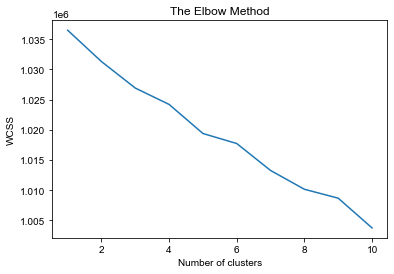

In [68]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

As more than one elbows have been generated, I will have to select right amount of clusters by trial and error. So, I will showcase the results of different amount of clusters to find out the right amount of clusters.

In [69]:
print(words[250:300])

['decis', 'declar', 'defenc', 'defend', 'delay', 'deliv', 'demand', 'deni', 'despit', 'destroy', 'detent', 'develop', 'die', 'director', 'disabl', 'disast', 'discuss', 'diseas', 'dismiss', 'disput', 'doctor', 'dog', 'dollar', 'domest', 'donald', 'donat', 'doubl', 'doubt', 'draw', 'dri', 'drink', 'drive', 'driver', 'drop', 'drought', 'drown', 'drug', 'drum', 'dump', 'dure', 'e', 'eagl', 'earli', 'eas', 'east', 'econom', 'economi', 'edg', 'educ', 'effort']


# 3 Clusters

In [70]:
kmeans = KMeans(n_clusters = 3, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
# We look at 3 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : new, say, plan, win, council, govt, australia, report, kill, fund, urg, court, warn, water, australian, nsw, open, chang, year, qld, interview, wa, death, face, crash
1 : polic, investig, probe, man, search, offic, hunt, miss, arrest, death, car, shoot, drug, seek, attack, assault, say, murder, crash, charg, driver, suspect, fatal, raid, station
2 : man, charg, murder, court, face, jail, assault, stab, die, death, drug, guilti, child, sex, accus, attack, woman, crash, arrest, car, kill, miss, sydney, alleg, plead


# 5 Clusters

In [71]:
kmeans = KMeans(n_clusters = 5, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 5 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : man, plan, charg, court, govt, australia, face, murder, accus, jail, assault, stab, urg, drug, death, attack, child, sex, die, woman, guilti, say, alleg, told, car
1 : new, zealand, law, year, plan, open, polic, home, hospit, centr, deal, set, hope, australia, look, appoint, announc, chief, say, south, minist, govt, rule, servic, welcom
2 : say, win, kill, report, australian, warn, interview, open, water, fund, nsw, crash, death, urg, year, chang, wa, sydney, claim, qld, hit, attack, world, set, health
3 : council, plan, consid, fund, rate, urg, seek, new, merger, water, land, develop, reject, say, mayor, vote, chang, elect, rise, meet, park, push, want, govt, approv
4 : polic, investig, man, probe, search, offic, hunt, miss, arrest, death, car, charg, shoot, drug, seek, attack, assault, murder, crash, say, driver, fatal, suspect, raid, woman


# 6 Clusters

In [72]:
kmeans = KMeans(n_clusters = 6, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 6 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : council, govt, australia, report, warn, urg, fund, australian, water, nsw, chang, qld, wa, health, elect, rural, countri, hour, sa, boost, climat, govern, servic, south, consid
1 : man, charg, murder, court, face, jail, assault, stab, die, death, drug, guilti, child, sex, accus, attack, woman, crash, arrest, car, kill, miss, sydney, plead, alleg
2 : polic, investig, probe, man, search, offic, hunt, miss, arrest, death, car, shoot, drug, seek, attack, crash, assault, murder, charg, driver, say, fatal, suspect, raid, warn
3 : win, kill, court, interview, crash, open, death, sydney, face, year, claim, hit, attack, world, set, final, day, hous, die, home, jail, talk, return, cup, hospit
4 : new, zealand, law, year, plan, open, council, polic, home, hospit, centr, deal, set, hope, australia, appoint, look, announc, chief, say, govt, south, minist, mayor, welcom
5 : say, plan, council, govt, water, need, group, chang, labor, minist, govern, opposit, public, mp, health, union, green, hous

# 8 Clusters

In [73]:
kmeans = KMeans(n_clusters = 8, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# Finally, we look at 8 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : polic, say, man, miss, arrest, jail, investig, car, search, murder, attack, crash, kill, probe, die, hunt, shoot, assault, offic, drug, stab, accus, fatal, guilti, bodi
1 : death, hous, polic, toll, investig, man, probe, inquest, rise, woman, coron, blaze, price, public, white, babi, sentenc, famili, road, spark, jail, prompt, blame, custodi, report
2 : plan, council, govt, water, new, say, develop, hous, group, chang, unveil, reject, park, urg, centr, public, expans, green, resid, health, reveal, labor, govern, opposit, power
3 : court, face, man, accus, told, hear, murder, high, case, appear, rule, charg, alleg, appeal, drug, jail, woman, death, assault, order, sex, stab, challeng, teen, polic
4 : australia, govt, kill, report, warn, australian, urg, fund, nsw, interview, water, open, crash, qld, chang, wa, year, day, claim, hit, attack, sydney, set, health, world
5 : new, council, zealand, law, fund, year, consid, water, urg, open, say, seek, rate, centr, mayor, govt, elect, loo

Because even I didn't know what kind of clusters would be generated, I will describe them in comments.

# Other discussions

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
import gensim
from collections import Counter
import string
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim_models
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from spacy import displacy
import nltk

import warnings

warnings.filterwarnings('ignore')

In [91]:
# set plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'figure.figsize': [16, 12]})
# plt.figure(figsize = [20, 20])
plt.style.use('seaborn-whitegrid')

In [54]:
df = pd.read_csv('~/data/cnews/abcnews-date-text.csv', nrows = 10000)
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


## Number of characters present in each sentence

<AxesSubplot:>

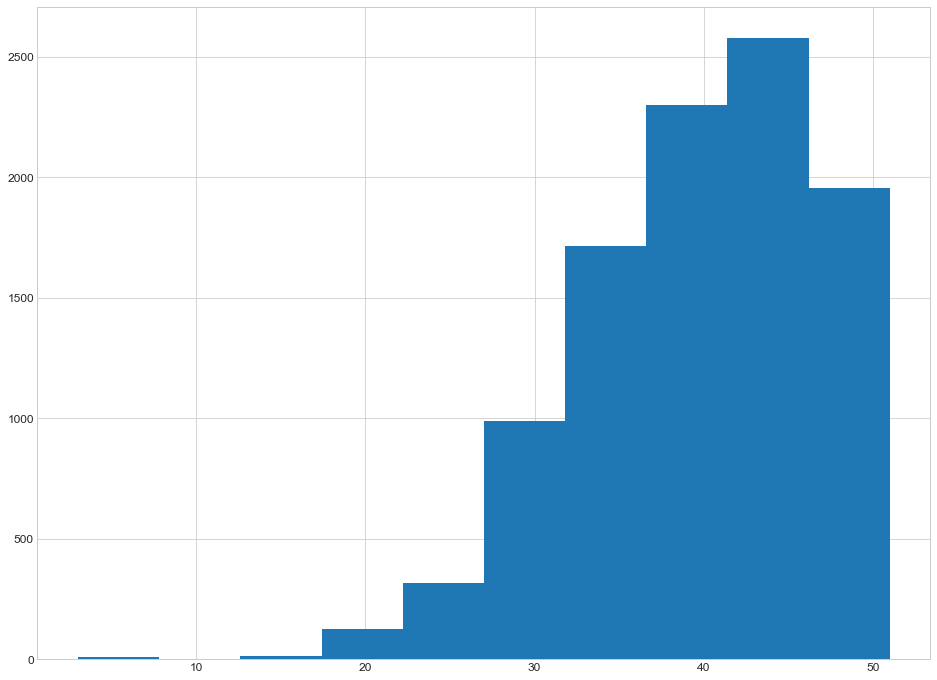

In [77]:
df['headline_text'].str.len().hist()

## number of words appearing in each news headline.

<AxesSubplot:>

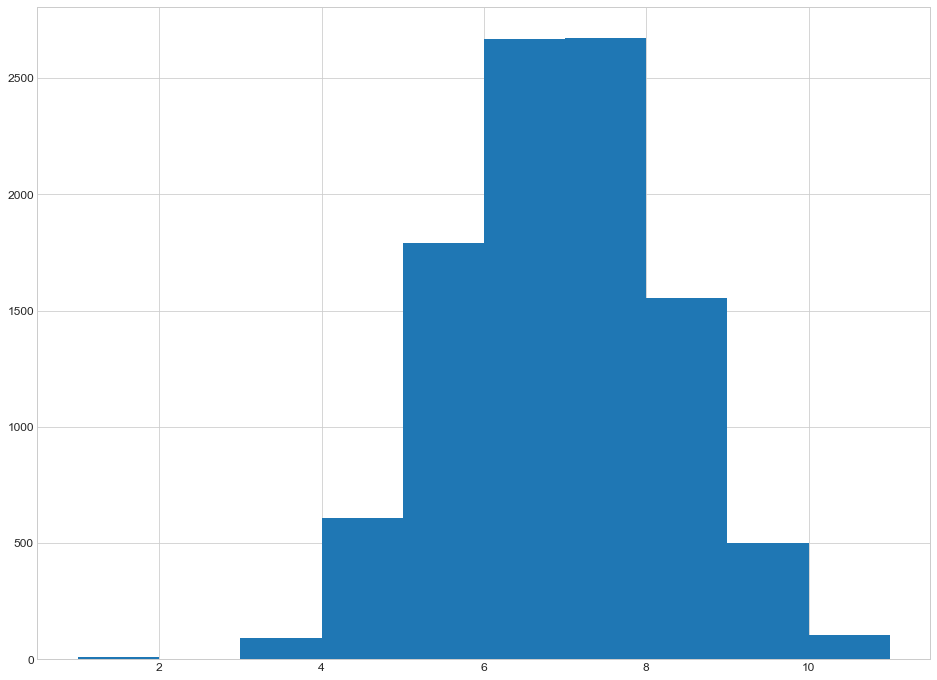

In [78]:
df['headline_text'].str.split().map(lambda x: len(x)).hist()

## Analysing word length

<AxesSubplot:>

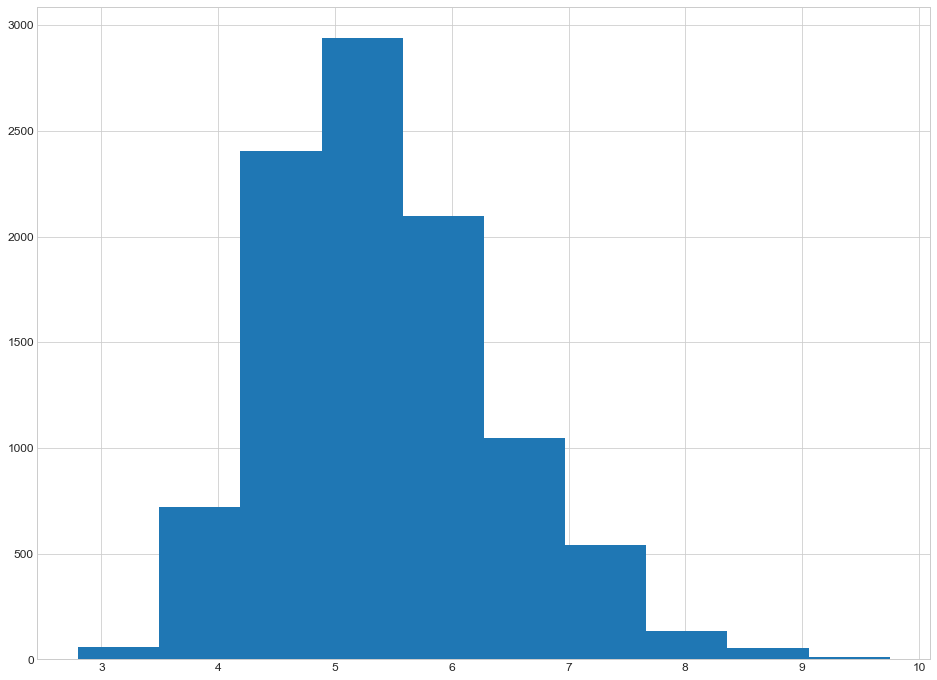

In [79]:
df['headline_text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

## Analysing stopwords

In [93]:
# Fetch stopwords
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/du/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:

# Create corpus
corpus=[]
new= df['headline_text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<BarContainer object of 10 artists>

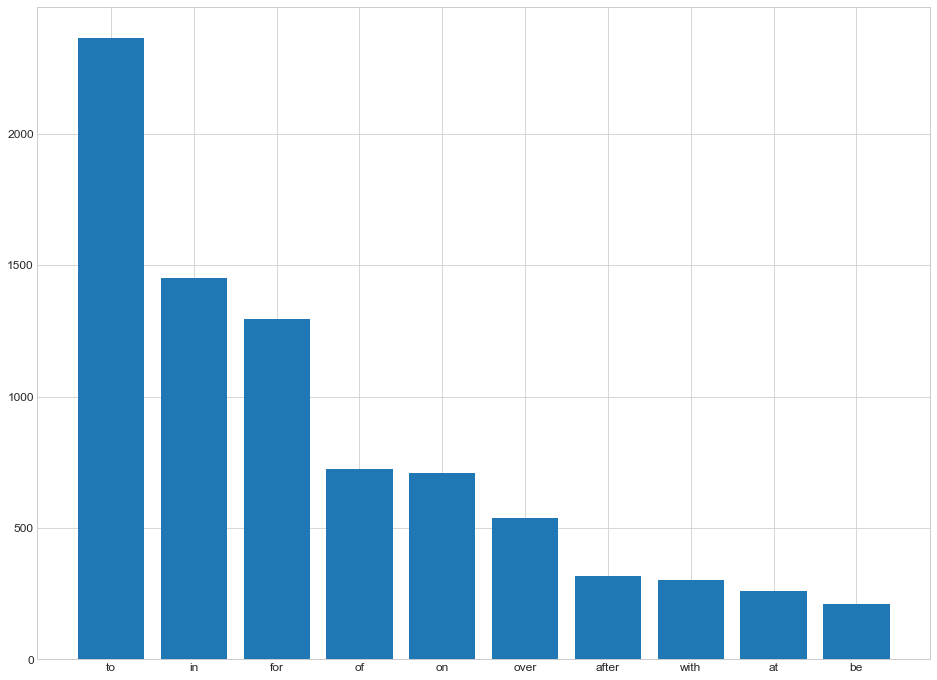

In [95]:
# Plot top stopwords

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

## Most common words

<AxesSubplot:>

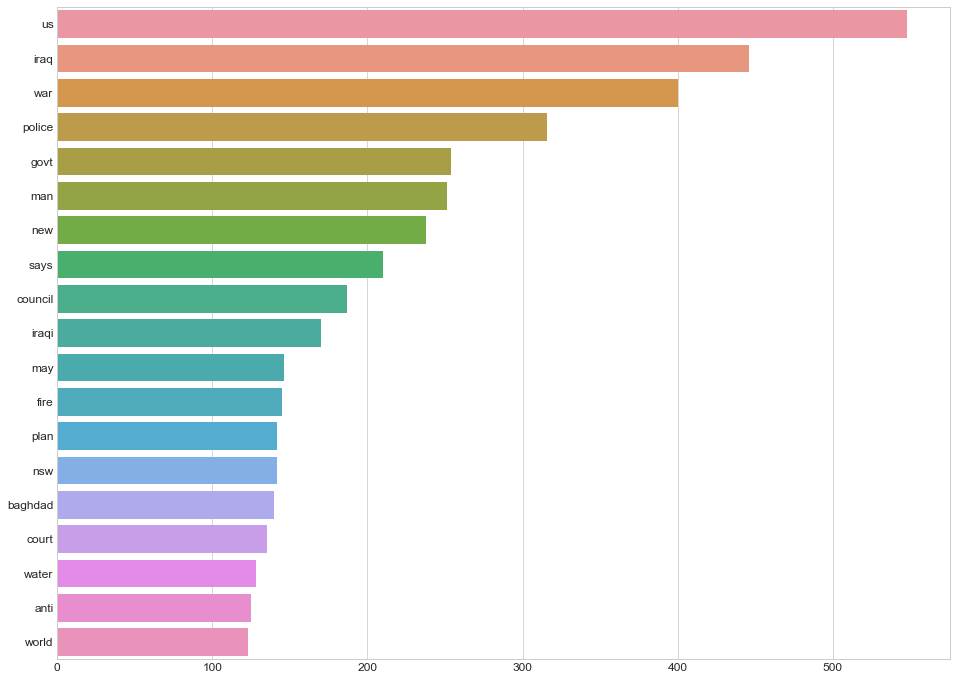

In [96]:
counter=Counter(corpus)
most=counter.most_common()

x, y=[], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

# Ngram analysis

## Bigram analysis

<AxesSubplot:>

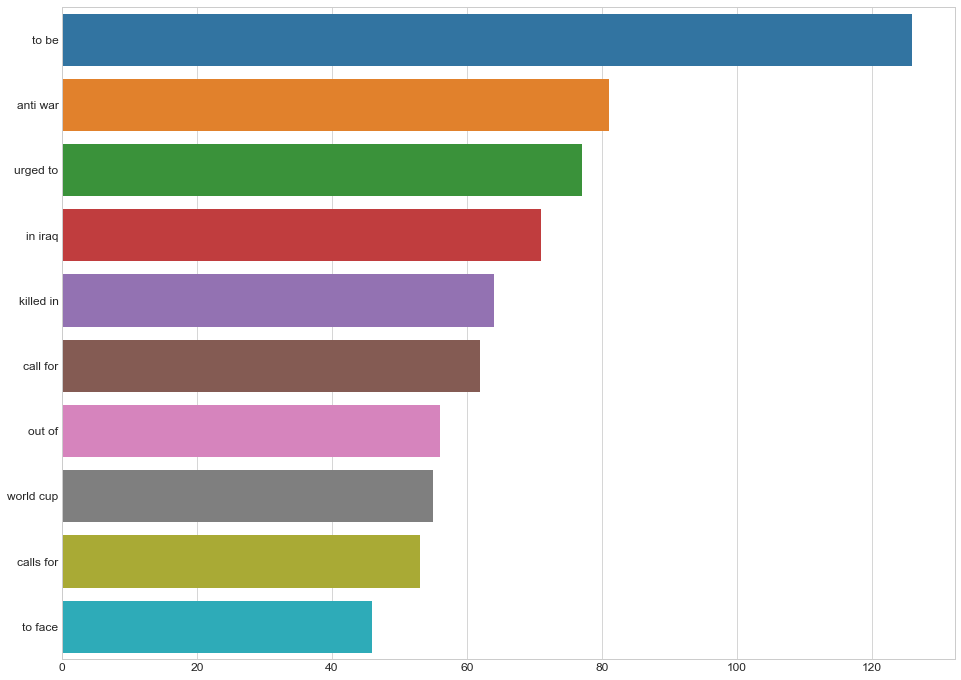

In [97]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

top_n_bigrams=get_top_ngram(df['headline_text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

## Trigram analysis

<AxesSubplot:>

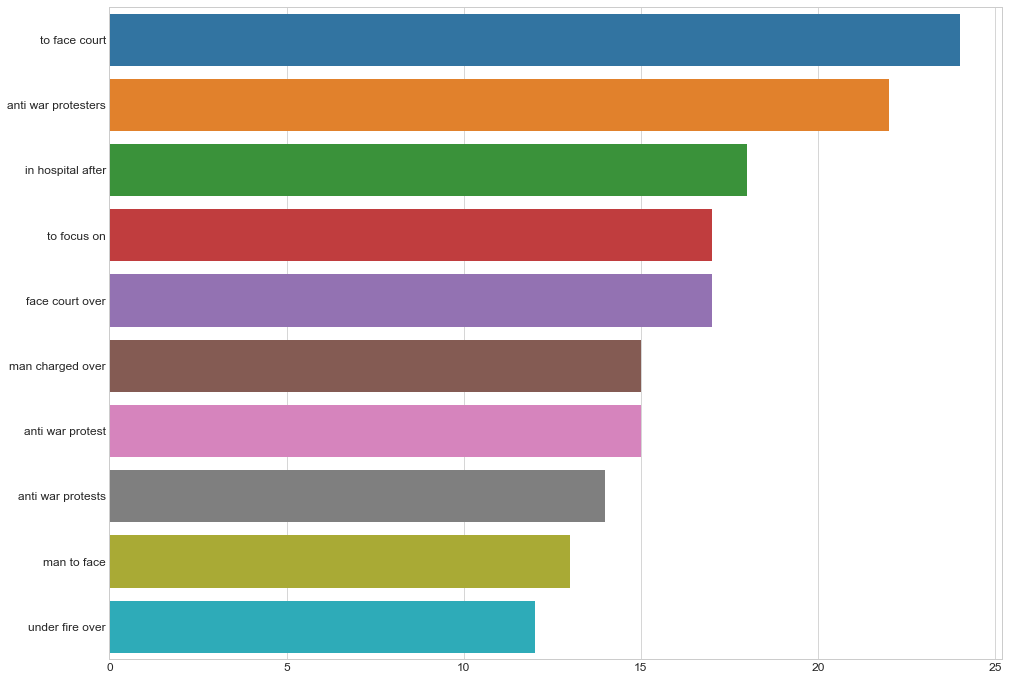

In [98]:
top_tri_grams=get_top_ngram(df['headline_text'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

# Topic modelling

In [99]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/du/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/du/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [100]:
def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in df['headline_text']:
        words=[w for w in word_tokenize(news) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

In [105]:
corpus = preprocess_news(df)

In [106]:
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [107]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)

In [108]:
lda_model.show_topics()

[(0,
  '0.010*"say" + 0.007*"cup" + 0.006*"war" + 0.005*"world" + 0.005*"back" + 0.005*"plan" + 0.005*"green" + 0.004*"win" + 0.004*"woman" + 0.004*"new"'),
 (1,
  '0.010*"govt" + 0.009*"war" + 0.009*"new" + 0.007*"may" + 0.005*"sars" + 0.005*"call" + 0.005*"protest" + 0.005*"boost" + 0.005*"group" + 0.004*"hospital"'),
 (2,
  '0.018*"police" + 0.015*"baghdad" + 0.014*"man" + 0.005*"missing" + 0.005*"claim" + 0.005*"court" + 0.005*"australia" + 0.004*"move" + 0.004*"murder" + 0.004*"charged"'),
 (3,
  '0.030*"iraq" + 0.015*"war" + 0.007*"iraqi" + 0.007*"council" + 0.006*"troop" + 0.005*"killed" + 0.004*"crash" + 0.004*"soldier" + 0.004*"open" + 0.004*"say"')]

## Visualize the topics

In [114]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.100547  0.109247       1        1  26.343851
3     -0.009820 -0.165592       2        1  25.727970
2     -0.169265  0.068747       3        1  25.515675
0      0.078538 -0.012402       4        1  22.412505, topic_info=         Term        Freq       Total Category  logprob  loglift
43       iraq  423.000000  423.000000  Default  30.0000  30.0000
274    police  241.000000  241.000000  Default  29.0000  29.0000
3498  baghdad  194.000000  194.000000  Default  28.0000  28.0000
316       man  201.000000  201.000000  Default  27.0000  27.0000
49        war  388.000000  388.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
56       take   32.869604  102.554271   Topic4  -5.8506   0.3577
187      govt   39.662697  214.835248   Topic4  -5.6627  -0.1939
42    council   35.744954  166.031649   Topic4  -5.7667  -0.0402
707       vic   28.426680   70.780744   Topic4  -5.9958   0.5833
11       call   29.042024  134.508476   Topic4  -5.9744  -0.0373

[280 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
371       4  0.973901  aboriginal
1745      4  0.928438        aged
50        1  0.155898         aid
50        2  0.846304         aid
15        1  0.215277         air
...     ...       ...         ...
487       4  0.561573       world
3782      2  0.979182     wounded
1351      1  0.335859        year
1351      2  0.655724        year
1351      3  0.015993        year

[467 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

# Wordclouds

In [115]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1 
        )
    
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

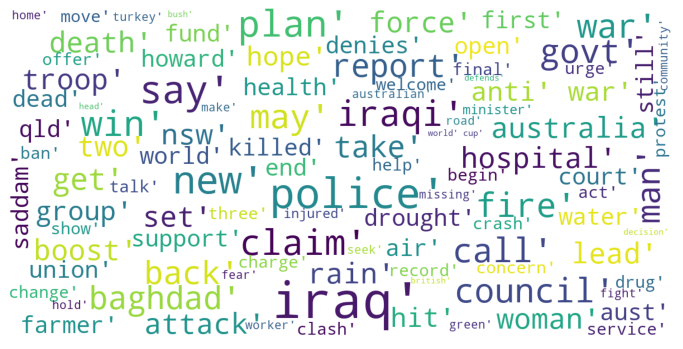

In [116]:
show_wordcloud(corpus)

# Text sentiment

In [117]:
from textblob import TextBlob
TextBlob('100 people killed in Iraq').sentiment

Sentiment(polarity=-0.2, subjectivity=0.0)

## Textblob

<AxesSubplot:>

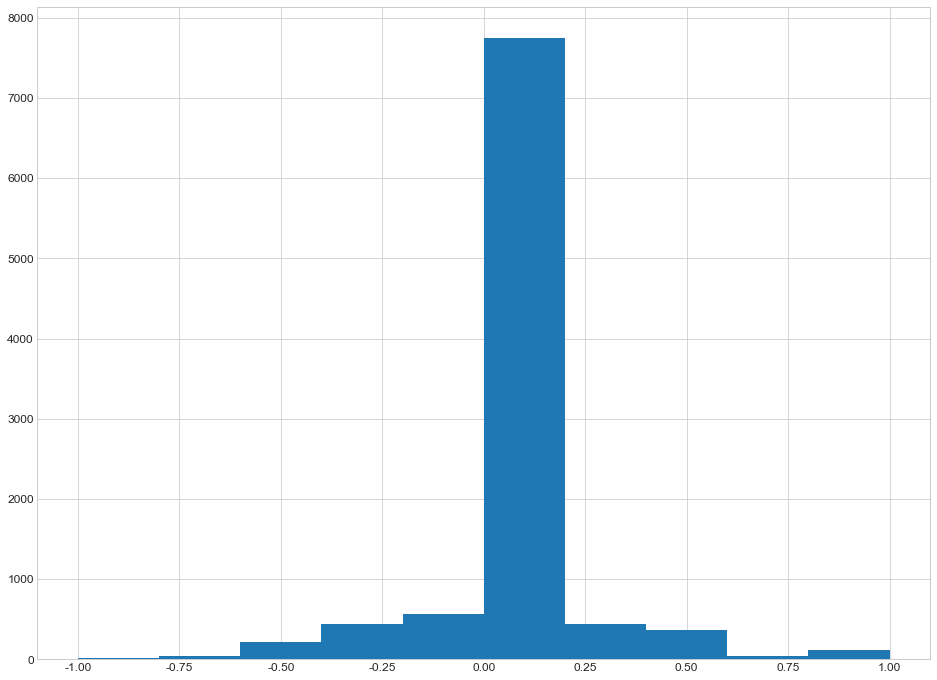

In [118]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity_score']=df['headline_text'].\
   apply(lambda x : polarity(x))
df['polarity_score'].hist()

## Postive , Negative or Neutral ?

In [119]:

def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
df['polarity']=df['polarity_score'].\
   map(lambda x: sentiment(x))

<BarContainer object of 3 artists>

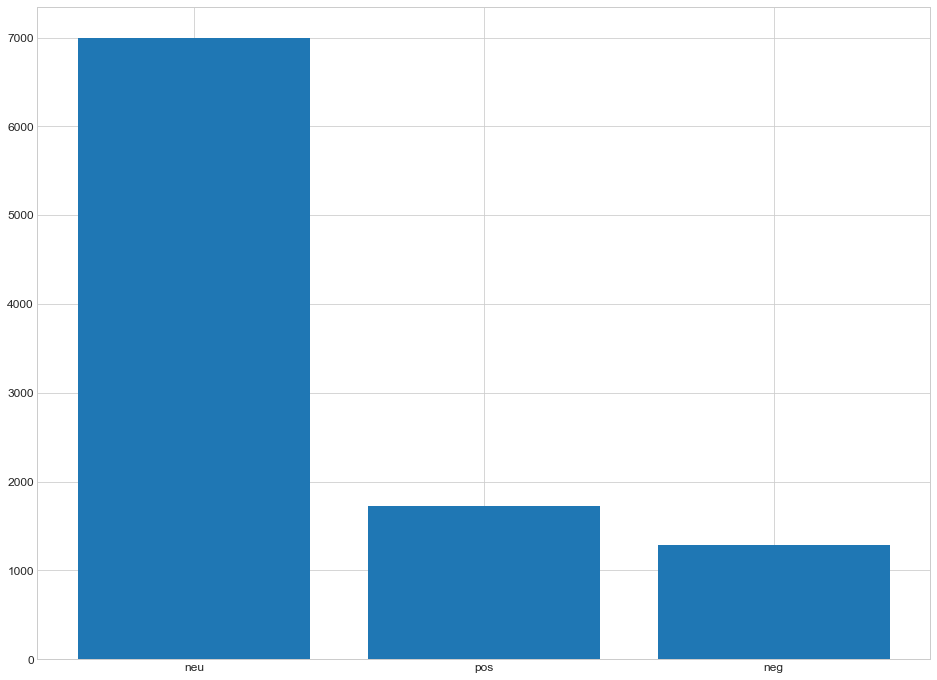

In [121]:
plt.bar(df.polarity.value_counts().index,
        df.polarity.value_counts())

In [122]:
df[df['polarity']=='neg']['headline_text'].head(5)

7     aussie qualifier stosur wastes four memphis match
23               carews freak goal leaves roma in ruins
28     council chief executive fails to secure position
34                   dargo fire threat expected to rise
40        direct anger at govt not soldiers crean urges
Name: headline_text, dtype: object

## Vader

In [124]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    #return ss
    return np.argmax(list(ss.values())[:-1])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/du/nltk_data...


In [125]:
df['polarity']=df['headline_text'].\
    map(lambda x: get_vader_score(x))
polarity=df['polarity'].replace({0:'neg',1:'neu',2:'pos'})

<BarContainer object of 3 artists>

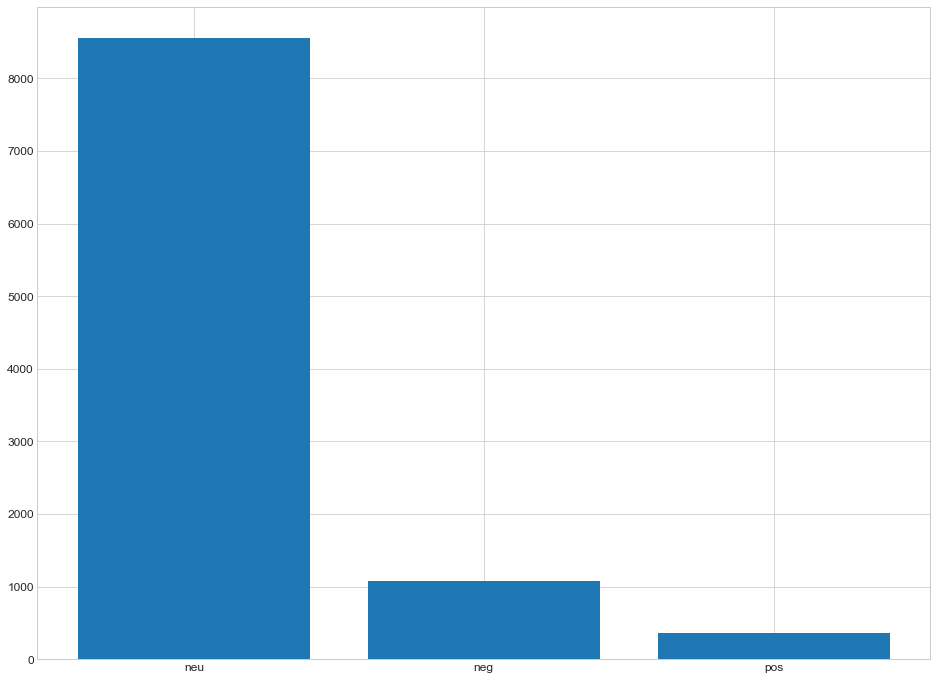

In [126]:
plt.bar(polarity.value_counts().index,
        polarity.value_counts())

# Named Entity Recognition

In [135]:
# !python -m spacy download en_core_web_sm

import spacy
from spacy import displacy
import en_core_web_sm

nlp = en_core_web_sm.load()

# nlp = spacy.load("en_core_web_sm")

doc=nlp('India and Iran have agreed to boost the economic \
viability of the strategic Chabahar port through various measures, \
including larger subsidies to merchant shipping firms using the facility, \
people familiar with the development said on Thursday.')

[(x.text,x.label_) for x in doc.ents]

[('India', 'GPE'), ('Iran', 'GPE'), ('Chabahar', 'GPE'), ('Thursday', 'DATE')]

In [136]:
from spacy import displacy

displacy.render(doc, style='ent')

##  NER Analysis

In [137]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

In [138]:
ent=df['headline_text'].apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]
counter=Counter(ent)
count=counter.most_common()

<AxesSubplot:>

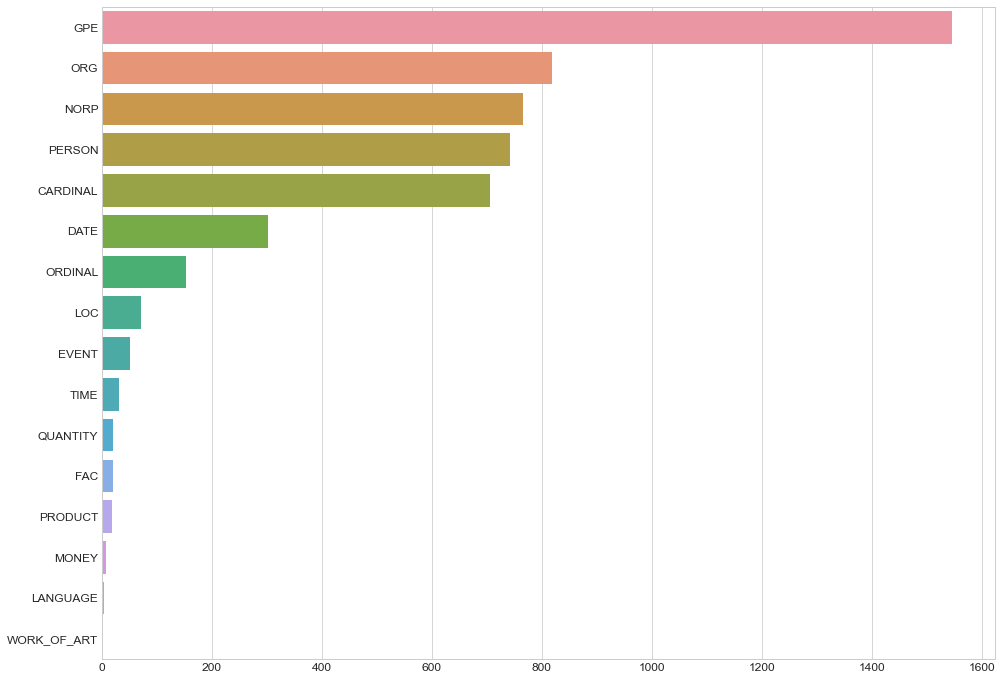

In [139]:
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

## Most common GPE

In [140]:

def ner(text,ent="GPE"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

<AxesSubplot:>

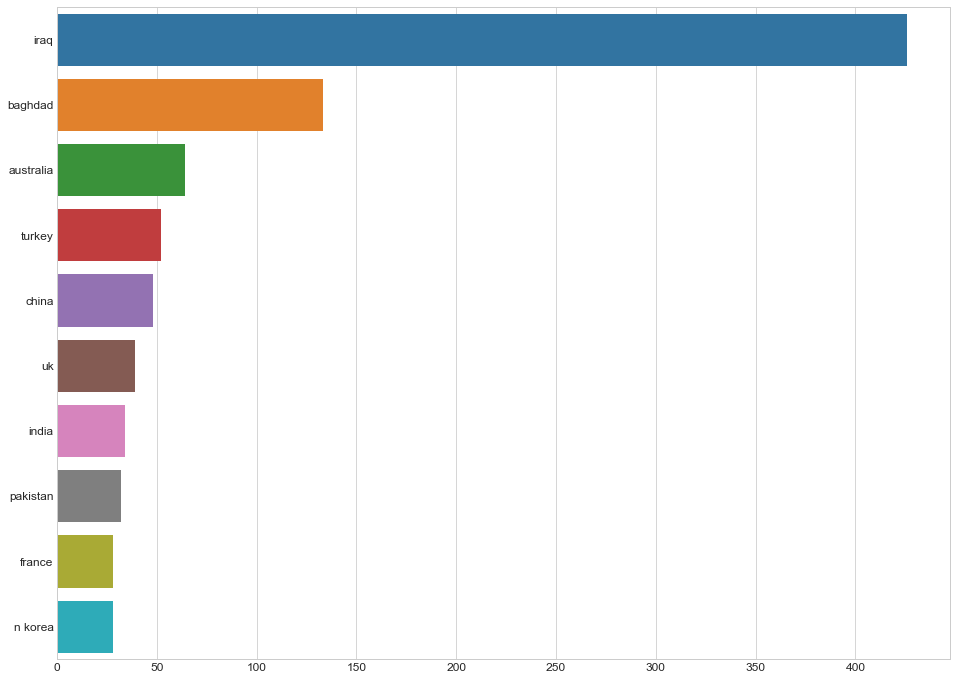

In [141]:
gpe=df['headline_text'].apply(lambda x: ner(x,"GPE"))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

## Most common person

<AxesSubplot:>

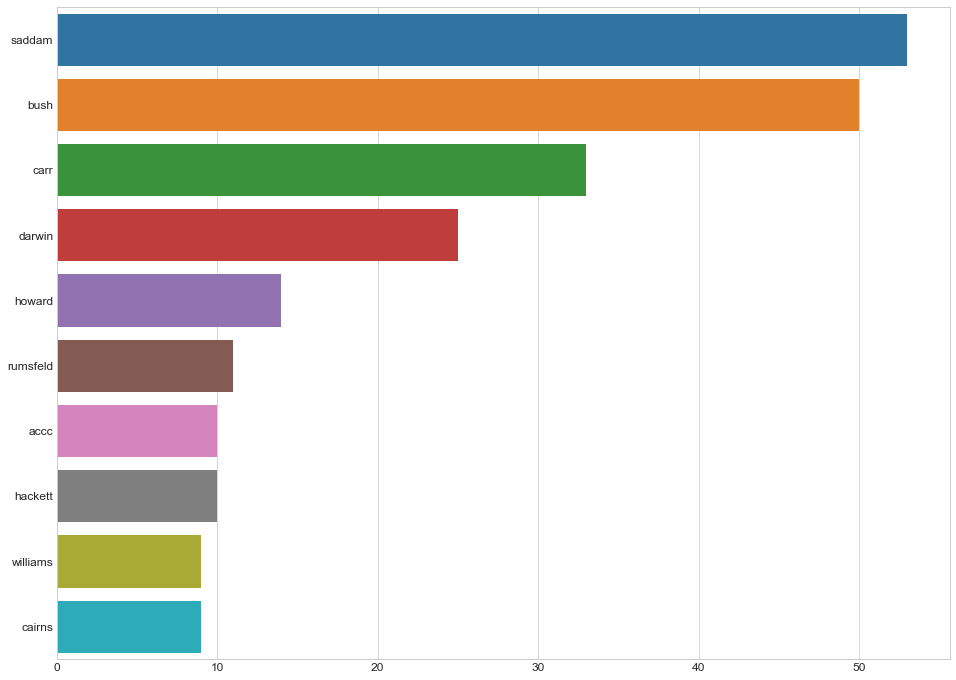

In [142]:
per=df['headline_text'].apply(lambda x: ner(x,"PERSON"))
per=[i for x in per for i in x]
counter=Counter(per)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

# Pos tagging

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

In [ ]:
sentence="The greatest comeback stories in 2019"
tokens=word_tokenize(sentence)
nltk.pos_tag(tokens)

In [150]:
doc = nlp('The greatest comeback stories in 2019')
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

## Analysing pos tags

In [158]:
def pos(text):
    pos=nltk.pos_tag(word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

In [ ]:
tags=df['headline_text'].apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)
x,y=list(map(list,zip(*counter.most_common(7))))

<AxesSubplot:>

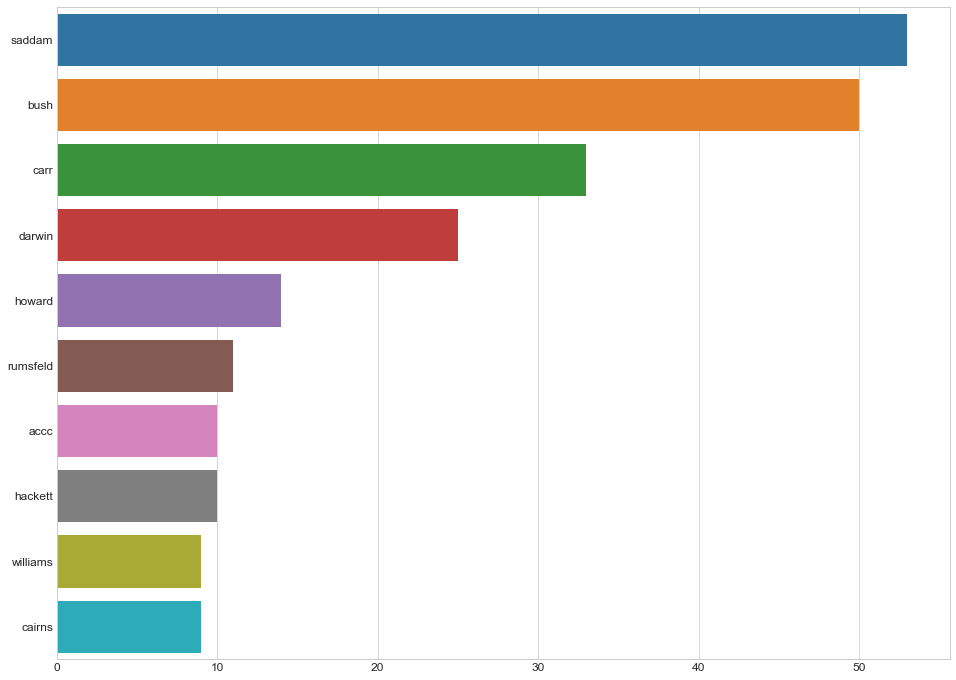

In [160]:
sns.barplot(x=y,y=x)

## Most common Nouns

In [ ]:
def get_adjs(text):
    adj=[]
    pos=nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag=='NN':
            adj.append(word)
    return adj


words=df['headline_text'].apply(lambda x : get_adjs(x))
words=[x for l in words for x in l]
counter=Counter(words)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

## dependency graph

In [ ]:
doc = nlp('She sells seashells by  the seashore')
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

# Text readability

## Textstat

In [ ]:
from textstat import flesch_reading_ease

In [ ]:
df['headline_text'].apply(lambda x : flesch_reading_ease(x)).hist()

## Complex headlines?

In [162]:
x=[i for i in range(len(reading)) if reading[i]<5]

NameError: name 'reading' is not defined

In [ ]:
news.iloc[x]['headline_text'].head()

NameError: name 'news' is not defined